<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Column_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Based on: https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

# example of using the ColumnTransformer for the Abalone dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
 
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv'
dataframe = read_csv(url, header=None)
dataframe.head()


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


1. Title of Database: Abalone data

2. Relevant Information Paragraph:

   Predicting the age of abalone from physical measurements.  The age of
   abalone is determined by cutting the shell through the cone, staining it,
   and counting the number of rings through a microscope -- a boring and
   time-consuming task.  Other measurements, which are easier to obtain, are
   used to predict the age.  Further information, such as weather patterns
   and location (hence food availability) may be required to solve the problem.

   From the original data examples with missing values were removed (the
   majority having the predicted value missing), and the ranges of the
   continuous values have been scaled for use with an ANN (by dividing by 200).

   Data comes from an original (non-machine-learning) study:

	Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and
	Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_
	species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North
	Coast and Islands of Bass Strait", Sea Fisheries Division, Technical
	Report No. 48 (ISSN 1034-3288)


Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years



In [11]:
# split into inputs and outputs
last_ix = len(dataframe.columns) - 1
X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
print(X.shape, y.shape)

(4177, 8) (4177,)


In [3]:
# determine categorical and numerical features
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

In [9]:
# define the data preparation for the columns
t = [('cat', OneHotEncoder(), categorical_ix),
     ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)


In [12]:
# define the model Support Vector Regression.
model = SVR(kernel='rbf',gamma='scale',C=100)

# define the data preparation and modeling pipeline

pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])

# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)


# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


# convert MAE scores to positive values
scores = absolute(scores)


# summarize the model performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 1.465 (0.047)


Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

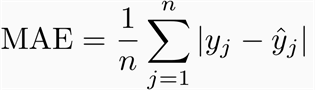